# EDA and Plotting Time Series

This notebook explains how to:
* Store time series
* Do the basic EDA of time series
* Plot the time series

in R using ```fpp3``` is meta-package.

This notebook is made for **beginners** in R language.

## ```fpp3``` package



```fpp3``` is meta-package that loads several core libreraries for modern time series analysis in R, most importantly:


*   ```tsibble```: The fundamental data structure (Time Series Tibble)
*   ```fable```: For forcasting models (ETS, ARIMA, etc.)
*   ```feasts```: For feature extraction and statistics
*   ```ggplot2```: For visualization (via ```autoplot```)
*   ``dplyr```: For data manipulation



In [8]:
install.packages("fpp3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘progressr’, ‘ggdist’, ‘numDeriv’, ‘warp’, ‘BH’, ‘fabletools’, ‘distributional’, ‘slider’, ‘anytime’, ‘fable’, ‘feasts’, ‘tsibble’, ‘tsibbledata’




In [9]:
library(fpp3)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.2 ──

✔ tibble      3.3.0     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.2
✔ lubridate   1.9.4     ✔ fable       0.4.1
✔ ggplot2     4.0.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



### ```tsibble``` Object Structure

```tsibble``` (Time Series Tibble) is data structure that has 3 types of columns:
*   **Index**: The time variable
*   **Key**: One or more variables that uniquely identify each series
*  **Measurements**: The actual data values (features/targets)

*Example*

We have a dataset tracking daily temperature for 3 different cities Paris, London and Belgrade.

* Index is Date
* Key is City
* Measurement is Temperature

In [10]:
# Define the input data (tibble)
daily_data <- tibble(
  Date = rep(seq(ymd("2025-01-01"), ymd("2025-01-05"), by = "day"), 3),
  City = rep(c("Paris", "London", "Belgrade"), each = 5),
  Temperature = c(3.1, 4.5, 3, 4.33, 5, 4, 4.7, 4.5, 4.2, 5, 3.5, 5, 5.1, 4, 4.3)
)

In [11]:
# Convert data into tsibble object
daily_tsibble <- daily_data |>
  as_tsibble(index = Date, key = City)

In [12]:
daily_tsibble

Date,City,Temperature
<date>,<chr>,<dbl>
2025-01-01,Belgrade,3.50
2025-01-02,Belgrade,5.00
2025-01-03,Belgrade,5.10
2025-01-04,Belgrade,4.00
2025-01-05,Belgrade,4.30
2025-01-01,London,4.00
2025-01-02,London,4.70
2025-01-03,London,4.50
2025-01-04,London,4.20


In R:

*   ```<-``` is the standard assignment operator
*   ```c()``` concatenates multiple values into a vector
*   ```|>``` takes the result on the left and pass it as the first argument to the function on the right



### Visualization using ```autoplot()```

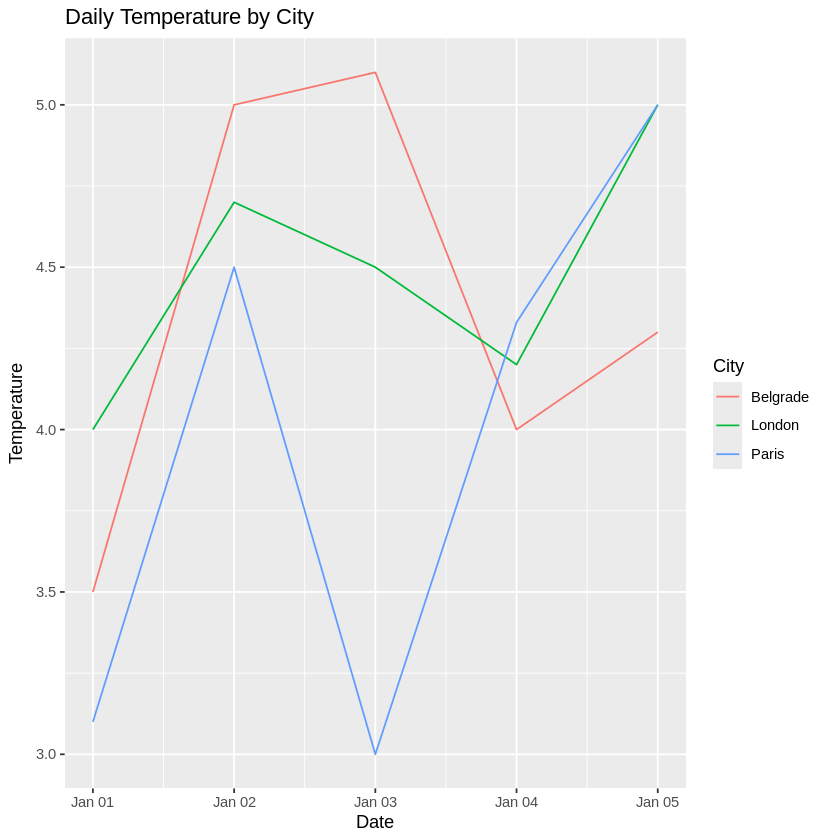

In [13]:
daily_tsibble |>
  autoplot(Temperature) +
  labs(title = "Daily Temperature by City", x = "Date", y = "Temperature")

### Filter data using ```dplyr```

In [14]:
daily_tsibble |>
  filter(City == "London") -> london_daily_tsible

In [15]:
london_daily_tsible

Date,City,Temperature
<date>,<chr>,<dbl>
2025-01-01,London,4.0
2025-01-02,London,4.7
2025-01-03,London,4.5
2025-01-04,London,4.2
2025-01-05,London,5.0


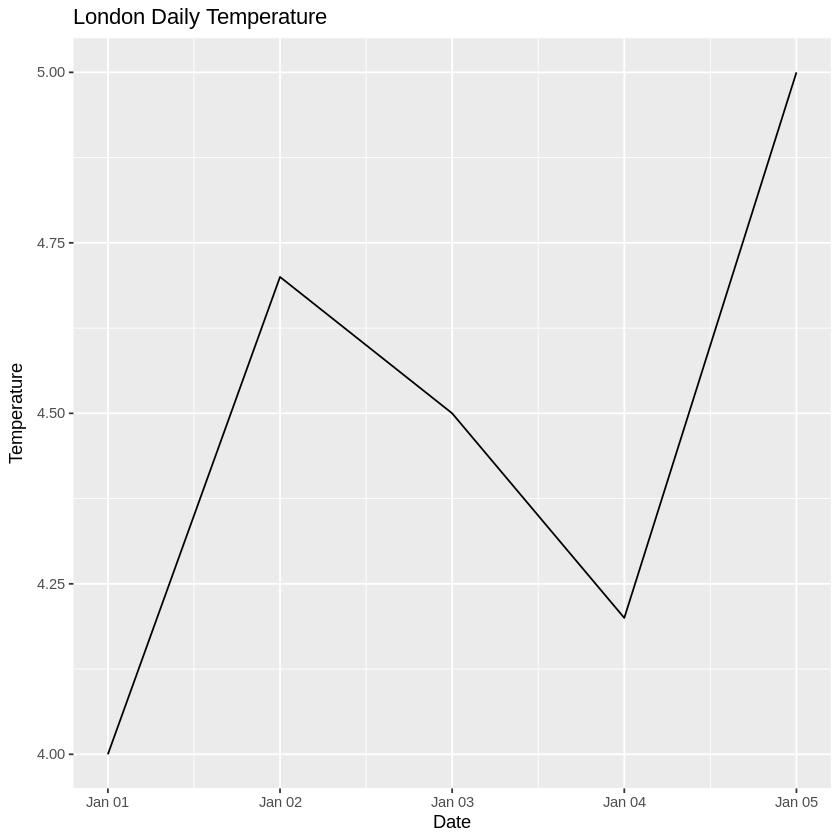

In [16]:
london_daily_tsible |>
  autoplot(Temperature) +
  labs(title = "London Daily Temperature", x = "Date", y = "Temperature")

## More complex example #1

PBS is publicly available dataset in R describing monthly medicare prescription data in Australia.

It contains the following values:

*   **Scripts** — the total number of scripts (i.e. prescriptions)
*   **Cost** — cost of the scripts (in AUD — Australian dollars)

The data is disaggregated using four keys:
* **Concession**:	Concessional scripts are given to pensioners, unemployed, dependents, and other card holders
Type:	Co-payments are made until an individual's script expenditure hits a threshold (\$290.00 for concession, \$1141.80 otherwise). Safety net subsidies are provided to individuals exceeding this amount.
* **ATC1**:	Anatomical Therapeutic Chemical index (level 1)
* **ATC2**:	Anatomical Therapeutic Chemical index (level 2)

[Documentation on PBS dataset](https://rdrr.io/cran/tsibbledata/man/PBS.html)

In [17]:
head(PBS)

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877
1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011
1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020
1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222
1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120
1991 Dec,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15028,54299


We are interested only in medications for diabetes. For those medications ATC2 = A10.

In [18]:
# filter() keeps only the rows that satisfy a condition
PBS |>
  filter(ATC2 == "A10") -> a10

In [19]:
head(a10)

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,89733,2092878
1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,77101,1795733
1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,76255,1777231
1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,78681,1848507
1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,70554,1686458
1991 Dec,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,75814,1843079


In [20]:
  # select() keeps only specified columns
  a10 |>
    select(Month, Concession, Type, Cost) -> a10_reduced

In [21]:
head(a10_reduced)

Month,Concession,Type,Cost
<mth>,<chr>,<chr>,<dbl>
1991 Jul,Concessional,Co-payments,2092878
1991 Aug,Concessional,Co-payments,1795733
1991 Sep,Concessional,Co-payments,1777231
1991 Oct,Concessional,Co-payments,1848507
1991 Nov,Concessional,Co-payments,1686458
1991 Dec,Concessional,Co-payments,1843079


In [24]:
a10_reduced |>
  summarise(TotalC = sum(Cost) / 1e6) -> a10_summarised

In [25]:
head(a10_summarised)

Month,TotalC
<mth>,<dbl>
1991 Jul,3.526591
1991 Aug,3.180891
1991 Sep,3.252221
1991 Oct,3.611003
1991 Nov,3.565869
1991 Dec,4.306371


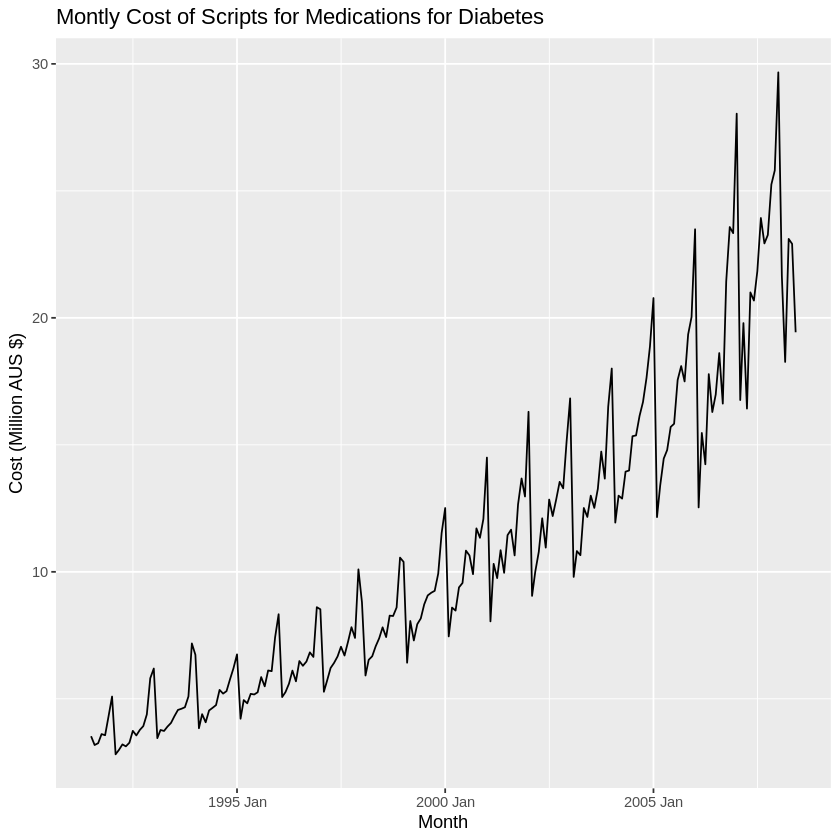

In [28]:
a10_summarised |>
  autoplot(TotalC) +
  labs(x = "Month", y = "Cost (Million AUS $)", title = "Montly Cost of Scripts for Medications for Diabetes")

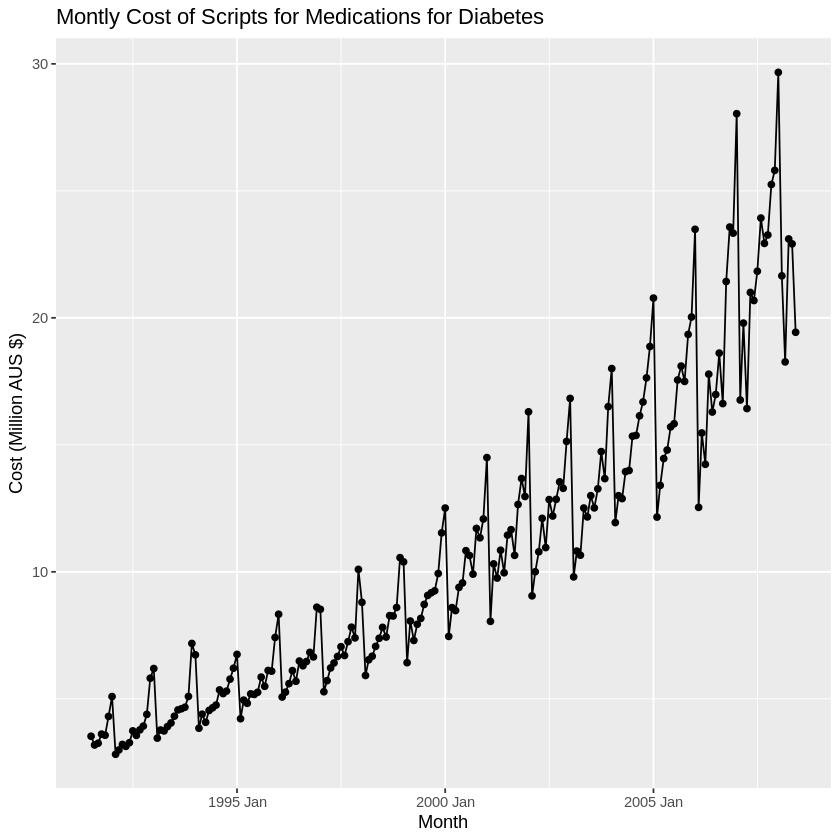

In [31]:
a10_summarised |>
  autoplot(TotalC) +
  geom_point() +
  labs(x = "Month", y = "Cost (Million AUS $)", title = "Montly Cost of Scripts for Medications for Diabetes")

In the plot above we se:
* **Seasonality** - spikes (peaks and troughs) are happening at a regular basis.
* Increasing and non-linear **trend**.
* the difference between the peack and the trough at the end is much larger then the difference at the biginning. We call this **multiplicative effect**.

## More complex example #2

```Ansett``` dataset contains multiple time series of total weekly air passenger numbers on Ansett airline flights between Melbourne and Sydney, 1987–1992.

Air traffic numbers are in thousands, and divided into first class, business class and economy class.

There was a major pilots' industrial dispute during the data period resulting in some weeks with zero traffic. There was also at least two changes in the definitions of passenger classes.

[Documentation of the dataset](https://search.r-project.org/CRAN/refmans/fpp/html/melsyd.html)

In [33]:
head(ansett)

Week,Airports,Class,Passengers
<week>,<chr>,<chr>,<dbl>
1989 W28,ADL-PER,Business,193
1989 W29,ADL-PER,Business,254
1989 W30,ADL-PER,Business,185
1989 W31,ADL-PER,Business,254
1989 W32,ADL-PER,Business,191
1989 W33,ADL-PER,Business,136


### EDA

In a ```tsibble``` the functions that return the index and keys are:
* ```index_var()```
* ```key_vars()```

In [37]:
index_var(ansett)

[1] "Week"

In [38]:
key_vars(ansett)

[1] "Airports" "Class"

There are two keys in anset dataset, "Airports" and "Class".

The functions that return all distinct values in a single column are:
* ```distinct()```: returns a tibble object
* ```unique()```: returns a vector

In [34]:
ansett |> distinct(Class)

Class
<chr>
Business
Economy
First


In [40]:
unique(ansett$Class) # Operator $ extracts a column

[1] "Business" "Economy"  "First"

In [41]:
unique(ansett$Airports)

[1] "ADL-PER" "MEL-ADL" "MEL-BNE" "MEL-OOL" "MEL-PER" "MEL-SYD" "SYD-ADL"
 [8] "SYD-BNE" "SYD-OOL" "SYD-PER"

### Different plots

There are 3 different values in "Class" column and 10 in "Airports" column. That means the dataset consists of
$$ 3 \cdot 10 = 30 $$
time series.

When we try to plot all of them, the plot is messy.

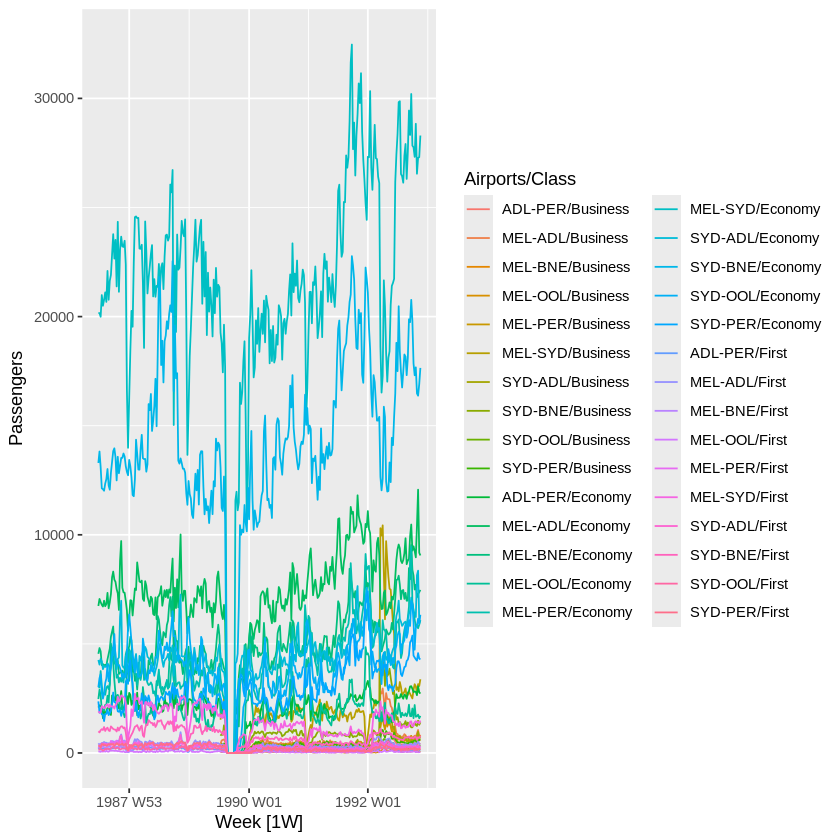

In [42]:
ansett |>
  autoplot(Passengers)

Because of that we filter by "Class" column and plot number of passangers in economy class in all 10 routes.

In [45]:
ansett |>
  filter(Class == "Economy") -> ansett_economy

In [46]:
head(ansett_economy)

Week,Airports,Class,Passengers
<week>,<chr>,<chr>,<dbl>
1987 W26,ADL-PER,Economy,2084
1987 W27,ADL-PER,Economy,2186
1987 W28,ADL-PER,Economy,2137
1987 W29,ADL-PER,Economy,2090
1987 W30,ADL-PER,Economy,1595
1987 W31,ADL-PER,Economy,1908


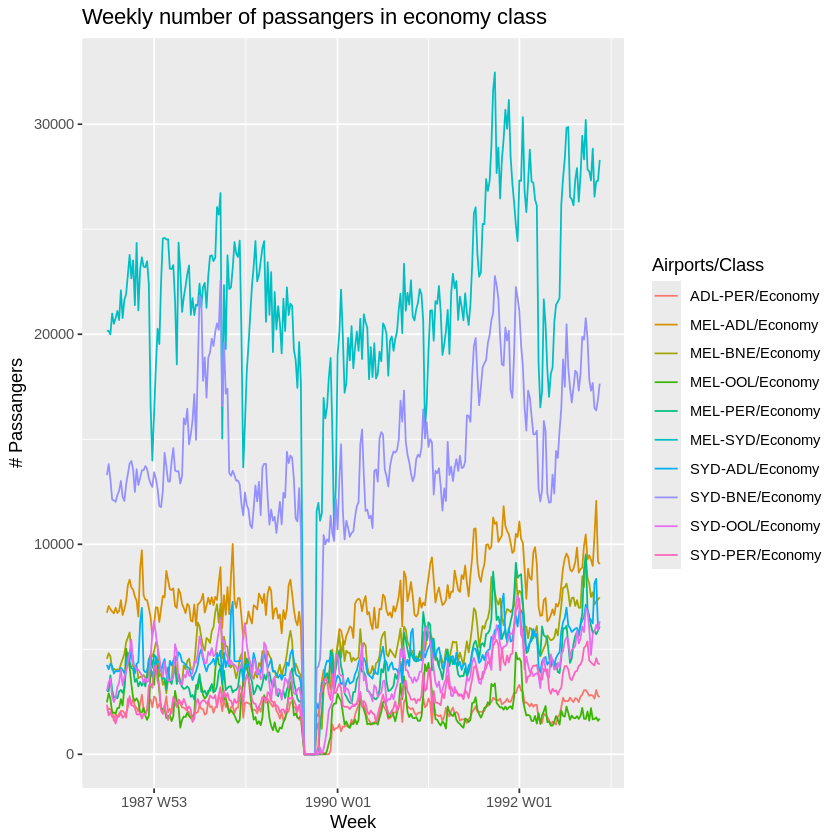

In [47]:
ansett_economy |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in economy class")

Now, we can filter by Airports and look at only Melburn-Sydney route.

In [51]:
ansett |>
  filter(Airports == "MEL-SYD") -> ansett_mel_syd

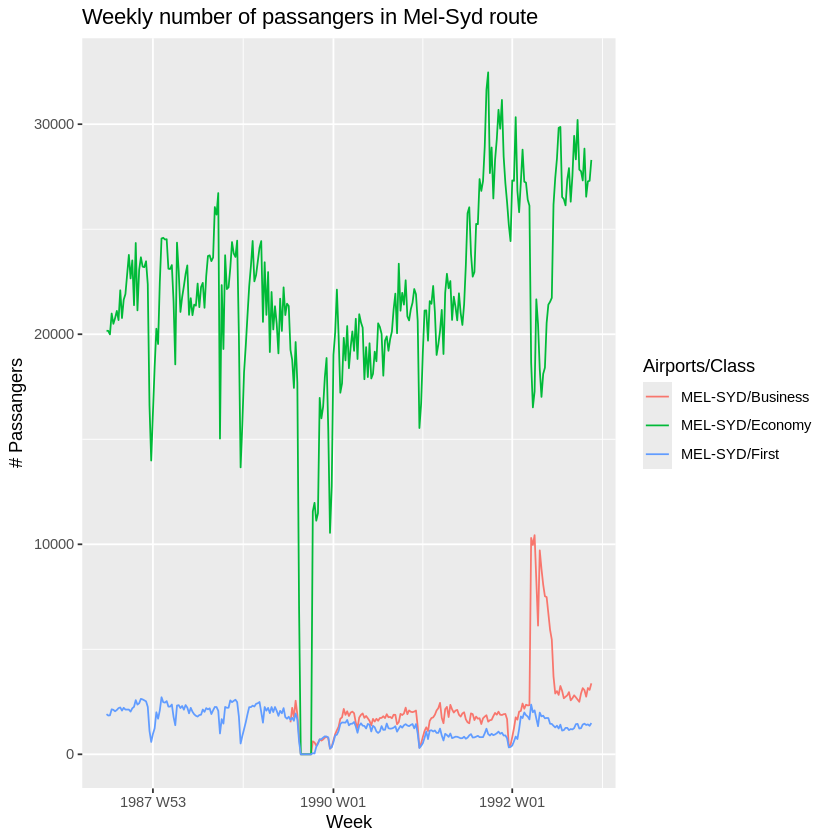

In [53]:
ansett_mel_syd |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in Mel-Syd route")

There are two externally caused features in the data:

* Dip in the late '80s was caused by pilots strike, so there was no flights.

* Higher number of passangers in bussiness class and lower number of passangers in economy clss in 1992. was caused by airline substituting economy for business class.


Now, let's look only at the number of passangers in economy class for a specific route "MEL-SYD".

In [57]:
ansett_economy_mel_syd <-
  ansett_economy |>
    filter(Airports == "MEL-SYD")

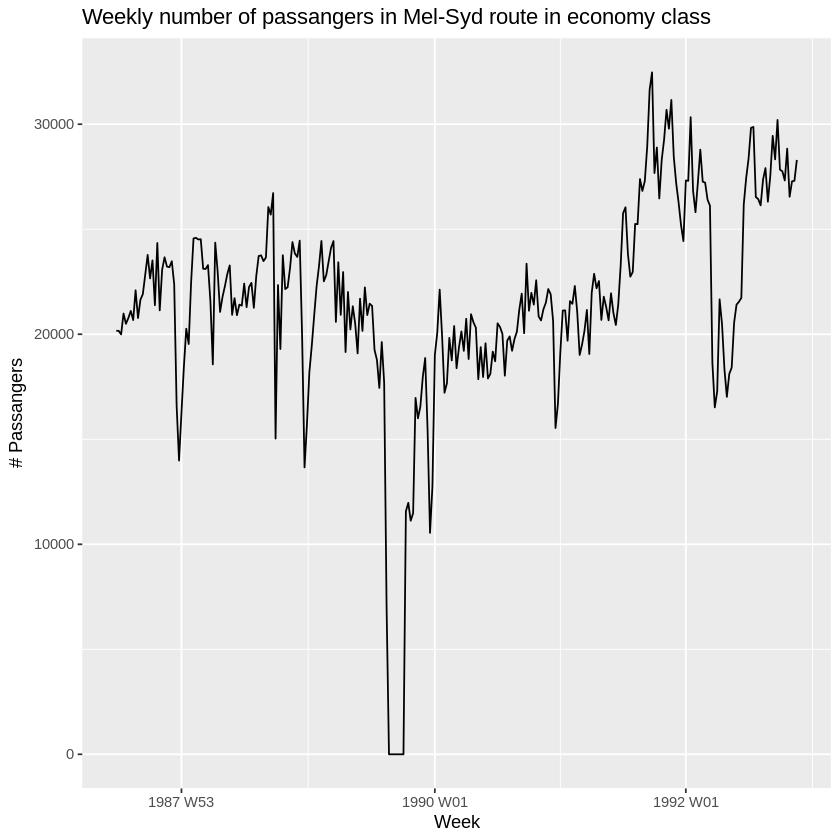

In [58]:
ansett_economy_mel_syd |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in Mel-Syd route in economy class")

Features that plot reveals are:

* **Dips** at the end of a year are caused by Christmas. There are no flights happening during the Christmas.
* **Spikes** are caused by sport events happening in Australia.

Recources:
* Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018. [Online tutorial on tutorial on Time plots](https://otexts.com/fpp3/time-plots.html#time-plots)